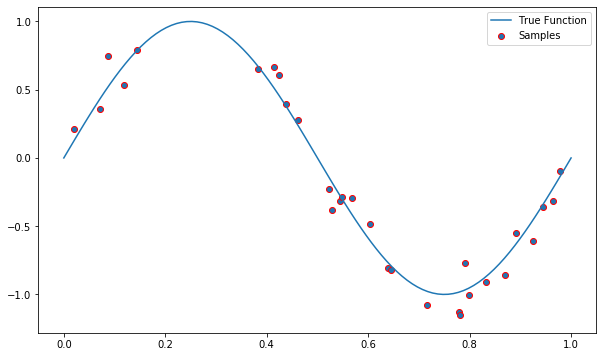

In [2]:
# Splitting Your Data

import  numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

def true_fxn(x):
    """Sine wave function"""
    return np.sin(2 * np.pi * x)

np.random.seed(0)

# Generate random points centered around the true function with a bit of random noise added
num_samples = 30
noise_strength = 0.1
X = np.sort(np.random.rand(num_samples))
y = true_fxn(X) + np.random.randn(num_samples) * noise_strength

plt.figure(figsize=(10, 6))
X_range = np.linspace(0, 1, 100)
plt.plot(X_range, true_fxn(X_range), label="True Function")
plt.scatter(X, y, label="Samples", edgecolor='r')
plt.legend(loc="best")
plt.show()

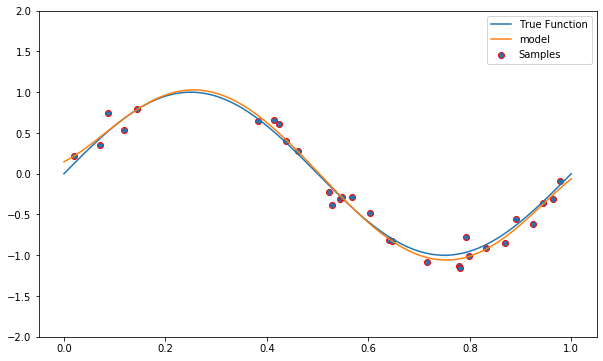

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(degree=5), LinearRegression()) # degree=5: x**5 + x**4 + x**3 + x**2 + x + c
model.fit(X[:, np.newaxis], y)

plt.figure(figsize=(10, 6))
X_range = np.linspace(0, 1, 100)
plt.plot(X_range, true_fxn(X_range), label="True Function")
plt.plot(X_range, model.predict(X_range[:, np.newaxis]), label="model")
plt.scatter(X, y, label="Samples", edgecolor='r')
plt.legend(loc="best")
plt.ylim((-2, 2))
plt.show()

In [15]:
model.score(X[:, np.newaxis], y)

0.9705524705587532

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.reshape(30, 1), y, test_size=0.3)

In [17]:
model.fit(X_train, y_train)

print("Model performance on traing set: {}".format(model.score(X_train, y_train)))
print("Model performance on testing set: {}".format(model.score(X_test, y_test)))

Model performance on traing set: 0.971640446314943
Model performance on testing set: 0.9412239393443682


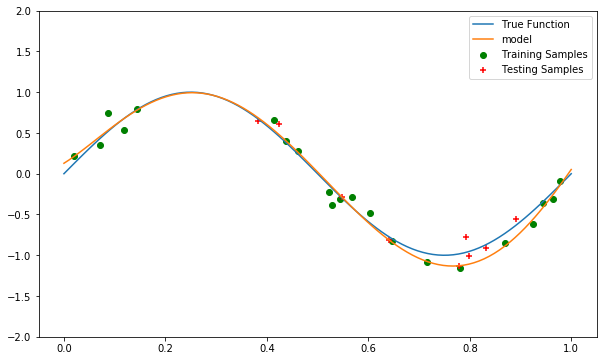

In [18]:
plt.figure(figsize=(10, 6))
X_range = np.linspace(0, 1, 100)
plt.plot(X_range, true_fxn(X_range), label="True Function")
plt.plot(X_range, model.predict(X_range[:, np.newaxis]), label="model")
plt.scatter(X_train, y_train, label="Training Samples", color='g')
plt.scatter(X_test, y_test, label="Testing Samples", color='r', marker="+")
plt.legend(loc="best")
plt.ylim((-2, 2))
plt.show()

In [22]:
from sklearn.metrics import confusion_matrix

actual_values = [2, 0, 2, 2, 0, 1]
predictions = [0, 0, 2, 2, 0, 2]

confusion_matrix(actual_values, predictions)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [27]:
from sklearn.metrics import r2_score

score = r2_score(actual_values, predictions)
score

-0.034482758620689724

In [28]:
from sklearn.metrics import balanced_accuracy_score

score = balanced_accuracy_score(actual_values, predictions)
score

0.5555555555555555

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(actual_values, predictions)
recall = recall_score(actual_values, predictions)
f1_score = f1_score(actual_values, predictions)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y, scores)

roc_auc_score(y_true, y_scores)

NameError: name 'scores' is not defined